In [1]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, Sentence, FlairEmbeddings
from typing import List
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer
from flair.visual.training_curves import Plotter

In [2]:
# 1. get the corpus

# define columns
columns = {0: 'text', 1: 'key_phrase', 2: 'kp_type'}

# this is the folder in which train, test and dev files reside
data_folder = 'corpus_data/'

# init a corpus using column format, data folder and the names of the train, dev and test files
corpus: Corpus = ColumnCorpus(data_folder, columns)

2020-05-13 07:40:47,940 Reading data from corpus_data
2020-05-13 07:40:47,941 Train: corpus_data/train.txt
2020-05-13 07:40:47,941 Dev: corpus_data/dev.txt
2020-05-13 07:40:47,942 Test: corpus_data/test.txt


In [3]:
print(len(corpus.train))
print(len(corpus.dev))
print(len(corpus.test))

1386
367
748


In [4]:
corpus.train[0].to_tagged_string('kp_type')

'The agreement <P> between <P> the <P> new <P> data <P> and <P> the <P> calculations <P> with <P> the <P> relativistic <P> deuteron <P> wave <P> function <P> should not be considered as accidental one ; in this connection other results should be mentioned.'

In [5]:
# 2. what tag do we want to predict?
tag_type = 'kp_type'

In [6]:
# 3. make the tag dictionary from the corpus
tag_dictionary = corpus.make_tag_dictionary(tag_type=tag_type)
print(tag_dictionary)

Dictionary with 7 tags: <unk>, O, P, T, M, <START>, <STOP>


In [7]:
# 4. initialize embeddings
embedding_types: List[TokenEmbeddings] = [

    WordEmbeddings('glove'),

    # comment in this line to use character embeddings
    # CharacterEmbeddings(),

    # comment in these lines to use flair embeddings
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]

embeddings: StackedEmbeddings = StackedEmbeddings(embeddings=embedding_types)

In [8]:
# 5. initialize sequence tagger
tagger: SequenceTagger = SequenceTagger(hidden_size=256,
                                        embeddings=embeddings,
                                        tag_dictionary=tag_dictionary,
                                        tag_type=tag_type,
                                        use_crf=True)

In [9]:
# 6. initialize trainer
trainer: ModelTrainer = ModelTrainer(tagger, corpus)

In [10]:
# 7. start training
trainer.train('resources/taggers/kp_type',
              learning_rate=0.1,
              mini_batch_size=16,
              max_epochs=50)

2020-05-13 07:41:05,629 ----------------------------------------------------------------------------------------------------
2020-05-13 07:41:05,630 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings('glove')
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, bias=True)
  (rnn): LSTM(4196, 256, batch_first=True, b

/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type StackedEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type WordEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type FlairEmbeddings. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Users/hn19405/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type LanguageModel. It won't be checked for cor

2020-05-13 07:54:54,231 ----------------------------------------------------------------------------------------------------
2020-05-13 07:55:02,997 epoch 2 - iter 8/87 - loss 12.07858109 - samples/sec: 14.61
2020-05-13 07:55:11,786 epoch 2 - iter 16/87 - loss 13.28158951 - samples/sec: 14.63
2020-05-13 07:55:21,071 epoch 2 - iter 24/87 - loss 14.23392403 - samples/sec: 13.86
2020-05-13 07:55:30,665 epoch 2 - iter 32/87 - loss 14.39355555 - samples/sec: 13.39
2020-05-13 07:55:40,417 epoch 2 - iter 40/87 - loss 14.33225362 - samples/sec: 13.37
2020-05-13 07:55:49,660 epoch 2 - iter 48/87 - loss 14.26512502 - samples/sec: 13.90
2020-05-13 07:56:00,231 epoch 2 - iter 56/87 - loss 14.09694980 - samples/sec: 12.16
2020-05-13 07:56:10,582 epoch 2 - iter 64/87 - loss 13.89869200 - samples/sec: 12.43
2020-05-13 07:56:19,894 epoch 2 - iter 72/87 - loss 13.74209734 - samples/sec: 13.84
2020-05-13 07:56:28,761 epoch 2 - iter 80/87 - loss 13.52851523 - samples/sec: 14.49
2020-05-13 07:56:36,275 --

2020-05-13 08:24:53,045 epoch 8 - iter 48/87 - loss 10.77286371 - samples/sec: 6.43
2020-05-13 08:25:14,200 epoch 8 - iter 56/87 - loss 10.80778011 - samples/sec: 6.07
2020-05-13 08:25:32,531 epoch 8 - iter 64/87 - loss 10.68980858 - samples/sec: 7.00
2020-05-13 08:25:52,398 epoch 8 - iter 72/87 - loss 10.69207667 - samples/sec: 6.46
2020-05-13 08:26:12,307 epoch 8 - iter 80/87 - loss 10.64501269 - samples/sec: 6.45
2020-05-13 08:26:27,940 ----------------------------------------------------------------------------------------------------
2020-05-13 08:26:27,942 EPOCH 8 done: loss 10.5344 - lr 0.1000
2020-05-13 08:26:41,860 DEV : loss 8.560266494750977 - score 0.3761
2020-05-13 08:26:41,924 BAD EPOCHS (no improvement): 3
2020-05-13 08:26:41,927 ----------------------------------------------------------------------------------------------------
2020-05-13 08:27:01,397 epoch 9 - iter 8/87 - loss 11.21758580 - samples/sec: 6.58
2020-05-13 08:27:21,269 epoch 9 - iter 16/87 - loss 10.853307

2020-05-13 08:46:27,588 EPOCH 14 done: loss 9.1611 - lr 0.0500
2020-05-13 08:46:38,989 DEV : loss 7.4709625244140625 - score 0.5035
2020-05-13 08:46:39,058 BAD EPOCHS (no improvement): 2
2020-05-13 08:46:39,060 ----------------------------------------------------------------------------------------------------
2020-05-13 08:46:55,634 epoch 15 - iter 8/87 - loss 9.67295069 - samples/sec: 7.72
2020-05-13 08:47:11,673 epoch 15 - iter 16/87 - loss 9.02724960 - samples/sec: 8.01
2020-05-13 08:47:27,972 epoch 15 - iter 24/87 - loss 9.19444742 - samples/sec: 7.88
2020-05-13 08:47:42,491 epoch 15 - iter 32/87 - loss 9.25181633 - samples/sec: 8.85
2020-05-13 08:47:59,576 epoch 15 - iter 40/87 - loss 9.17879626 - samples/sec: 7.52
2020-05-13 08:48:15,027 epoch 15 - iter 48/87 - loss 8.89012988 - samples/sec: 8.31
2020-05-13 08:48:32,124 epoch 15 - iter 56/87 - loss 9.04829143 - samples/sec: 7.51
2020-05-13 08:48:48,701 epoch 15 - iter 64/87 - loss 9.09297144 - samples/sec: 7.75
2020-05-13 08:49:

2020-05-13 09:08:35,361 epoch 21 - iter 32/87 - loss 8.93196321 - samples/sec: 6.20
2020-05-13 09:08:54,967 epoch 21 - iter 40/87 - loss 8.79820634 - samples/sec: 6.55
2020-05-13 09:09:14,655 epoch 21 - iter 48/87 - loss 8.77835992 - samples/sec: 6.52
2020-05-13 09:09:34,355 epoch 21 - iter 56/87 - loss 8.75354760 - samples/sec: 6.52
2020-05-13 09:09:52,082 epoch 21 - iter 64/87 - loss 8.61685422 - samples/sec: 7.24
2020-05-13 09:10:10,675 epoch 21 - iter 72/87 - loss 8.61326985 - samples/sec: 6.91
2020-05-13 09:10:30,434 epoch 21 - iter 80/87 - loss 8.61014717 - samples/sec: 6.50
2020-05-13 09:10:45,859 ----------------------------------------------------------------------------------------------------
2020-05-13 09:10:45,861 EPOCH 21 done: loss 8.5658 - lr 0.0250
2020-05-13 09:11:00,180 DEV : loss 7.511847972869873 - score 0.5234
2020-05-13 09:11:00,245 BAD EPOCHS (no improvement): 2
2020-05-13 09:11:00,247 -----------------------------------------------------------------------------

2020-05-13 09:30:59,339 ----------------------------------------------------------------------------------------------------
2020-05-13 09:30:59,341 EPOCH 27 done: loss 8.3189 - lr 0.0250
2020-05-13 09:31:10,671 DEV : loss 7.259561061859131 - score 0.5193
Epoch    26: reducing learning rate of group 0 to 1.2500e-02.
2020-05-13 09:31:10,737 BAD EPOCHS (no improvement): 4
2020-05-13 09:31:10,741 ----------------------------------------------------------------------------------------------------
2020-05-13 09:31:28,735 epoch 28 - iter 8/87 - loss 8.84044200 - samples/sec: 7.11
2020-05-13 09:31:45,949 epoch 28 - iter 16/87 - loss 8.90150431 - samples/sec: 7.46
2020-05-13 09:32:01,731 epoch 28 - iter 24/87 - loss 8.54524879 - samples/sec: 8.14
2020-05-13 09:32:19,456 epoch 28 - iter 32/87 - loss 8.62323974 - samples/sec: 7.24
2020-05-13 09:32:37,430 epoch 28 - iter 40/87 - loss 8.65438738 - samples/sec: 7.14
2020-05-13 09:32:53,868 epoch 28 - iter 48/87 - loss 8.45624865 - samples/sec: 7.82

2020-05-13 09:50:59,652 epoch 34 - iter 8/87 - loss 7.39825076 - samples/sec: 8.31
2020-05-13 09:51:16,185 epoch 34 - iter 16/87 - loss 7.59133211 - samples/sec: 7.77
2020-05-13 09:51:32,196 epoch 34 - iter 24/87 - loss 7.82081250 - samples/sec: 8.02
2020-05-13 09:51:49,139 epoch 34 - iter 32/87 - loss 8.00025280 - samples/sec: 7.58
2020-05-13 09:52:03,907 epoch 34 - iter 40/87 - loss 7.88885344 - samples/sec: 8.70
2020-05-13 09:52:21,146 epoch 34 - iter 48/87 - loss 7.97227927 - samples/sec: 7.45
2020-05-13 09:52:38,424 epoch 34 - iter 56/87 - loss 7.98779048 - samples/sec: 7.43
2020-05-13 09:52:53,588 epoch 34 - iter 64/87 - loss 8.08520488 - samples/sec: 8.47
2020-05-13 09:53:09,328 epoch 34 - iter 72/87 - loss 8.18749258 - samples/sec: 8.16
2020-05-13 09:53:26,083 epoch 34 - iter 80/87 - loss 8.12774632 - samples/sec: 7.67
2020-05-13 09:53:38,787 ----------------------------------------------------------------------------------------------------
2020-05-13 09:53:38,789 EPOCH 34 don

2020-05-13 10:11:53,838 epoch 40 - iter 56/87 - loss 7.79615211 - samples/sec: 7.45
2020-05-13 10:12:11,867 epoch 40 - iter 64/87 - loss 7.83044892 - samples/sec: 7.12
2020-05-13 10:12:28,812 epoch 40 - iter 72/87 - loss 7.93524531 - samples/sec: 7.58
2020-05-13 10:12:44,892 epoch 40 - iter 80/87 - loss 7.99515886 - samples/sec: 7.99
2020-05-13 10:12:57,921 ----------------------------------------------------------------------------------------------------
2020-05-13 10:12:57,922 EPOCH 40 done: loss 7.9689 - lr 0.0031
2020-05-13 10:13:08,772 DEV : loss 7.150417327880859 - score 0.5417
2020-05-13 10:13:08,834 BAD EPOCHS (no improvement): 3
2020-05-13 10:13:08,837 ----------------------------------------------------------------------------------------------------
2020-05-13 10:13:25,286 epoch 41 - iter 8/87 - loss 8.42862588 - samples/sec: 7.78
2020-05-13 10:13:43,043 epoch 41 - iter 16/87 - loss 8.45825225 - samples/sec: 7.23
2020-05-13 10:13:58,954 epoch 41 - iter 24/87 - loss 8.155922

2020-05-13 10:30:10,699 EPOCH 46 done: loss 7.8415 - lr 0.0008
2020-05-13 10:30:18,991 DEV : loss 7.114017009735107 - score 0.5519
2020-05-13 10:30:19,045 BAD EPOCHS (no improvement): 0
2020-05-13 10:30:23,740 ----------------------------------------------------------------------------------------------------
2020-05-13 10:30:36,207 epoch 47 - iter 8/87 - loss 8.53018767 - samples/sec: 10.27
2020-05-13 10:30:48,133 epoch 47 - iter 16/87 - loss 8.57268062 - samples/sec: 10.78
2020-05-13 10:31:02,231 epoch 47 - iter 24/87 - loss 8.45655904 - samples/sec: 9.11
2020-05-13 10:31:14,714 epoch 47 - iter 32/87 - loss 8.16186091 - samples/sec: 10.30
2020-05-13 10:31:27,589 epoch 47 - iter 40/87 - loss 8.11589237 - samples/sec: 9.98
2020-05-13 10:31:38,314 epoch 47 - iter 48/87 - loss 7.96682405 - samples/sec: 11.99
2020-05-13 10:31:50,019 epoch 47 - iter 56/87 - loss 7.77223521 - samples/sec: 10.98
2020-05-13 10:32:01,516 epoch 47 - iter 64/87 - loss 7.69291912 - samples/sec: 11.18
2020-05-13 1

{'test_score': 0.4592,
 'dev_score_history': [0.2474,
  0.4281,
  0.3342,
  0.3904,
  0.4791,
  0.3555,
  0.4233,
  0.3761,
  0.4323,
  0.4805,
  0.4837,
  0.5144,
  0.5136,
  0.5035,
  0.5064,
  0.4923,
  0.5046,
  0.5229,
  0.5326,
  0.5147,
  0.5234,
  0.5188,
  0.542,
  0.5075,
  0.5193,
  0.5295,
  0.5193,
  0.5287,
  0.5487,
  0.5388,
  0.5413,
  0.5288,
  0.5406,
  0.5423,
  0.5485,
  0.546,
  0.5429,
  0.5402,
  0.5454,
  0.5417,
  0.5445,
  0.5363,
  0.5442,
  0.5435,
  0.5454,
  0.5519,
  0.5443,
  0.546,
  0.5463,
  0.5458],
 'train_loss_history': [18.712002699402557,
  13.353153875504416,
  12.246133113729543,
  11.88865273574303,
  11.350874626773527,
  10.99610708499777,
  10.887776292603592,
  10.534418752823752,
  10.295478069919278,
  9.645185607603226,
  9.401124143052375,
  9.500559061423115,
  9.170881370018268,
  9.161099401013605,
  9.215183844511536,
  9.03324619380907,
  8.845242873005484,
  8.68594717157298,
  8.634018053953675,
  8.617753154930027,
  8.5658067

Weights plots are saved in resources/taggers/kp_type/weights.png


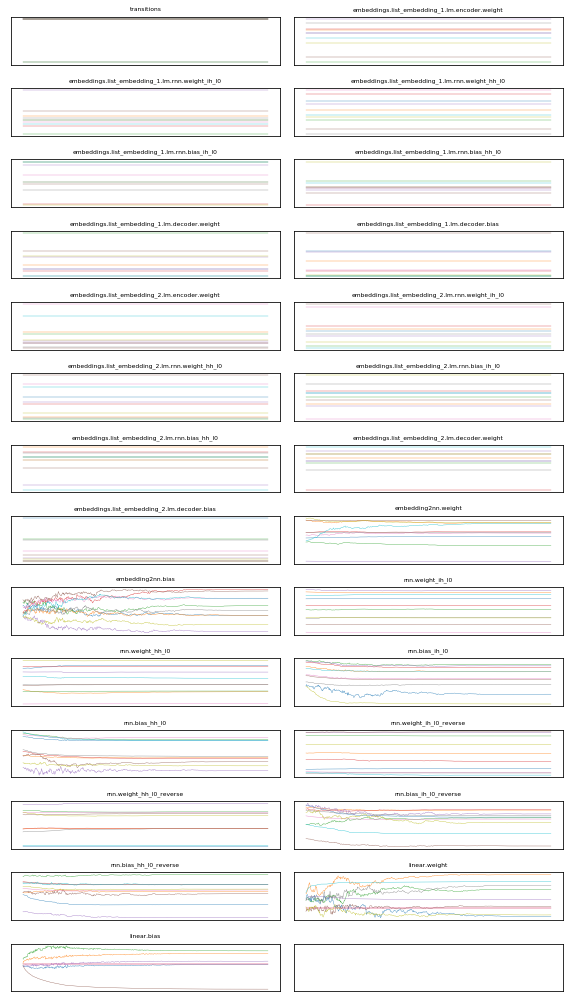

In [11]:
# 8. plot weight traces (optional)
plotter = Plotter()
plotter.plot_weights('resources/taggers/kp_type/weights.txt')

In [12]:
# 9. find learning rate
learning_rate_tsv = trainer.find_learning_rate('resources/taggers/kp_type',
                                                    'learning_rate.tsv')

[1.4454397707459274e-07]
[1.7378008287493754e-07]
[2.0892961308540395e-07]
[2.51188643150958e-07]
[3.019951720402016e-07]
[3.6307805477010137e-07]
[4.36515832240166e-07]
[5.248074602497725e-07]
[6.309573444801933e-07]
[7.585775750291837e-07]
[9.120108393559096e-07]
[1.096478196143185e-06]
[1.3182567385564074e-06]
[1.5848931924611132e-06]
[1.9054607179632473e-06]
[2.2908676527677735e-06]
[2.754228703338166e-06]
[3.311311214825911e-06]
[3.981071705534973e-06]
[4.7863009232263826e-06]
[5.754399373371569e-06]
[6.918309709189365e-06]
[8.317637711026708e-06]
[9.999999999999999e-06]
[1.202264434617413e-05]
[1.4454397707459279e-05]
[1.737800828749376e-05]
[2.0892961308540385e-05]
[2.5118864315095795e-05]
[3.019951720402016e-05]
[3.630780547701014e-05]
[4.365158322401661e-05]
[5.248074602497728e-05]
[6.309573444801929e-05]
[7.585775750291836e-05]
[9.120108393559096e-05]
[0.00010964781961431851]
[0.00013182567385564074]
[0.0001584893192461114]
[0.00019054607179632462]
[0.00022908676527677726]
[0

Learning_rate plots are saved in resources/taggers/kp_type/learning_rate.png


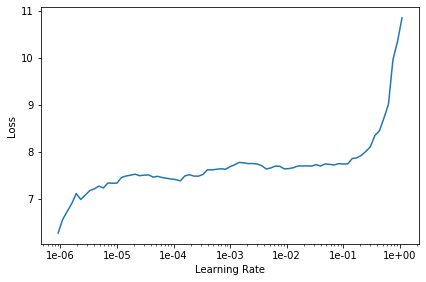

In [13]:
# plot the learning rate finder curve
plotter = Plotter()
plotter.plot_learning_rate('resources/taggers/kp_type/learning_rate.tsv')